In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from collections import defaultdict

from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer
from hydramuscle.model.shell import Shell
from hydramuscle.model.fluo_encoder import FluoEncoder
from hydramuscle.utils import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATH = "../results/data/calcium/cross_layer_density/"

In [3]:
files = os.listdir(PATH)

In [14]:
hashmap_fast_1 = defaultdict(lambda:[])
hashmap_fast_2 = defaultdict(lambda:[])
hashmap_slow_1 = defaultdict(lambda:[])
hashmap_slow_2 = defaultdict(lambda:[])

for file in tqdm(files):
    # Process calcium
    ca = pd.read_hdf(PATH + file)
    ca = ca.values.reshape(len(ca), 60, 60)
    ca_endo = ca[:, 30:, :]
    ca_avg_fast_1 = np.mean(ca_endo[int(0.05/0.02)])
    ca_avg_fast_2 = np.mean(ca_endo[int(0.1/0.02)])
    ca_avg_slow_1 = np.mean(ca_endo[int(30/0.02)])
    ca_avg_slow_2 = np.mean(ca_endo[int(45/0.02)])
    
    # Save data
    keywords = file.split('_')
    density = float(keywords[1])
    
    hashmap_fast_1[density].append(ca_avg_fast_1)
    hashmap_fast_2[density].append(ca_avg_fast_2)
    hashmap_slow_1[density].append(ca_avg_slow_1)
    hashmap_slow_2[density].append(ca_avg_slow_2)

100%|██████████| 300/300 [00:18<00:00, 16.12it/s]


In [45]:
densities = sorted(list(hashmap_fast_1.keys()))
means_fast_1 = []
stds_fast_1 = []
means_fast_2 = []
stds_fast_2 = []
means_slow_1 = []
stds_slow_1 = []
means_slow_2 = []
stds_slow_2 = []

for density in densities:
    means_fast_1.append(np.mean(hashmap_fast_1[density]))
    stds_fast_1.append(np.std(hashmap_fast_1[density]))
    means_fast_2.append(np.mean(hashmap_fast_2[density]))
    stds_fast_2.append(np.std(hashmap_fast_2[density]))
    means_slow_1.append(np.mean(hashmap_slow_1[density]))
    stds_slow_1.append(np.std(hashmap_slow_1[density]))
    means_slow_2.append(np.mean(hashmap_slow_2[density]))
    stds_slow_2.append(np.std(hashmap_slow_2[density]))

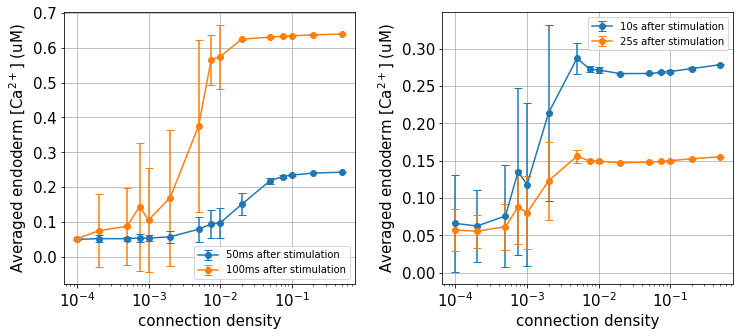

In [82]:
FONTSIZE = 15
TICKSIZE = 15

fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.3)
ax = fig.add_subplot(121)
ax.errorbar(densities, means_fast_1, yerr=stds_fast_1, fmt='-o', capsize=4, label='50ms after stimulation')
ax.errorbar(densities, means_fast_2, yerr=stds_fast_2, fmt='-o', capsize=4, label='100ms after stimulation')
ax.set_xscale('log')
ax.set_xlabel('connection density', fontsize=FONTSIZE)
ax.set_ylabel('Averaged endoderm [Ca$^{2+}$] (uM)', fontsize=FONTSIZE)
# ax.set_title("Cross-layer fast wave propagation versus connection density", fontsize=FONTSIZE)
ax.tick_params(axis='x', labelsize=TICKSIZE)
ax.tick_params(axis='y', labelsize=TICKSIZE)
ax.legend()
ax.grid()

ax = fig.add_subplot(122)
ax.errorbar(densities, means_slow_1, yerr=stds_slow_1, fmt='-o', capsize=4, label='10s after stimulation')
ax.errorbar(densities, means_slow_2, yerr=stds_slow_2, fmt='-o', capsize=4, label='25s after stimulation')
ax.set_xscale('log')
ax.set_xlabel('connection density', fontsize=FONTSIZE)
ax.set_ylabel('Averaged endoderm [Ca$^{2+}$] (uM)', fontsize=FONTSIZE)
# ax.set_title("Cross-layer bending wave propagation versus connection density", fontsize=FONTSIZE)
ax.tick_params(axis='x', labelsize=TICKSIZE)
ax.tick_params(axis='y', labelsize=TICKSIZE)
ax.legend()
ax.grid()

plt.savefig("../results/figures/cross-layer-quant.png", bbox_inches='tight')
plt.show()